In [ ]:
import sys
!{sys.executable} -m pip install mycolorpy

In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

from random import uniform


SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

TRAIN_SIZE = 200
LIMS = (-3, 3)
VAL_LIMS = (-3.5, 3.5)

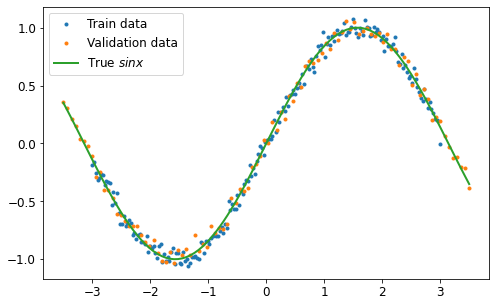

In [5]:
x_arr = torch.linspace(*LIMS, TRAIN_SIZE)
y_arr = torch.sin(x_arr) + torch.normal(0, 0.05, size=(TRAIN_SIZE,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1), y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_val = torch.linspace(*VAL_LIMS, 100)
y_val = torch.sin(x_val) + torch.normal(0, 0.05, size=(100,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

true_y = torch.sin(x_val)
dataset = Data.TensorDataset(x_val.unsqueeze(1), true_y.unsqueeze(1))
test_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=1, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

plt.rcParams["figure.figsize"] = (8,5)
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=3, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=3, label="Validation data")
plt.plot(x_val, true_y, label=f"True $sinx$", lw=2)
plt.legend()
plt.savefig("sin.png", dpi=300)
plt.show()

In [6]:
env = Environment(15, train_loader, train_epochs=25, validation_loader=val_loader)

cpu


In [7]:
start_time = time.time()
env.train_epoch()
print(f"Train ended in {int(time.time() - start_time)} s")
env.validate_entities(val_loader, True)
test_history = []
test_history.append(env.validate_entities(test_loader, False))

Train ended in 9 s


In [8]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.001189660152886063 2
0.004990539925638586 14
0.005968114202842116 8
0.009690774730406701 4
0.019272457687184212 3
0.03276863817125559 5
0.05507942825555802 0
0.06346772126853466 6
0.06421422135084867 11
0.07233013406395912 12
0.07346480987966061 1
0.07561582133173943 7
Evo epoch 1 ended in 10 s
0.001738167618168518 2
0.0032896426320075988 14
0.003549401871860027 14
0.004002834691200405 4
0.005282360315322876 8
0.005699751237407327 2
0.009408399243839086 8
0.01671773849520832 3
0.03982149362564087 5
0.041360723767429594 0
0.06619909815490246 6
0.06760235235095025 11
Evo epoch 2 ended in 11 s
0.002073719447944313 2
0.002439760121051222 14
0.002512942098546773 4
0.00300671910692472 14
0.0036012523993849757 14
0.005212520972127095 14
0.005565435714088381 2
0.0080820850469172 8
0.009087467426434159 8
0.016862701904028655 3
0.03637408450245857 5
0.04578981341794133 0
Evo epoch 3 ended in 12 s
0.0009511558688245714 2
0.0024488707532873376 2
0.0027342885942198336 4
0.002840060435701162 14
0.

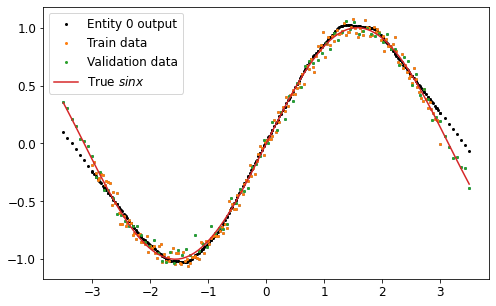

In [17]:
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[7].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=2, color="black")
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2, label="Validation data")
plt.plot(x_val, true_y, label=f"True $sinx$")
plt.legend()
plt.savefig("Entity_10_sin_output.png", dpi=300)
plt.show()

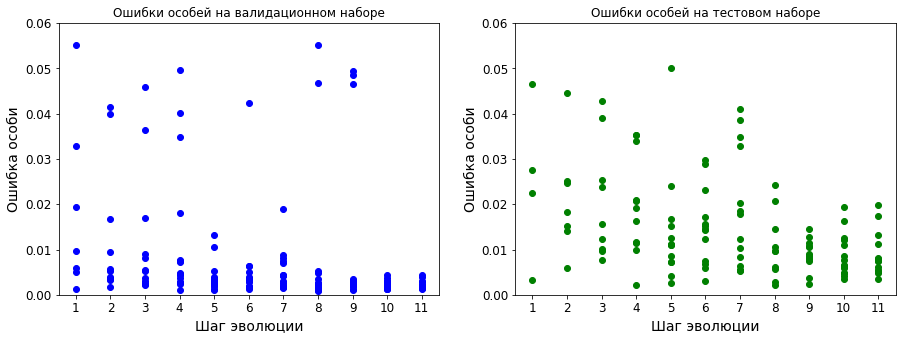

In [20]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.06))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.06))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1)))
plt.savefig("loss(evo_epoch)_10_sin.png", edgecolor='black', dpi=300, facecolor='white')
plt.show()

In [21]:
for i in range(20):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.001267950477777049 2
0.0014826647751033308 2
0.0015887643152382226 4
0.0016664574400056154 2
0.0016702051251195373 2
0.0019638638978358358 4
0.001992590437293984 2
0.002136312813963741 2
0.0022389954631216826 2
0.0028719820093829184 2
0.003110112260328606 2
0.003934494298882782 2
Evo epoch 1 ended in 12 s
0.0011149151716381312 2
0.0012931645521894097 2
0.0016455598012544213 2
0.0019081718637607992 2
0.002286389470100403 2
0.0026289347896818072 4
0.0035675959405489267 2
0.0039098652382381265 4
0.0040105801180470736 2
0.004090604363009334 2
0.0043077053187880665 2
0.004601910954806954 2
Evo epoch 2 ended in 11 s
0.0008686443325132132 2
0.0013350974430795758 2
0.0015854819375090302 2
0.001657477004919201 2
0.0018455875408835709 4
0.0018608253786806018 2
0.002038950170390308 4
0.0021174798207357526 2
0.002368676991900429 2
0.0026522787020076067 2
0.0032919819268863648 2
0.004257309939712286 2
Evo epoch 3 ended in 12 s
0.0009715800662524999 2
0.0011613881541416048 2
0.0013266660668887198 

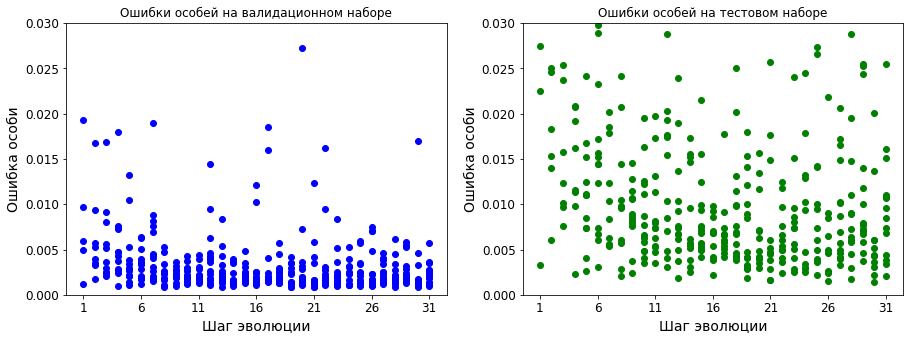

In [23]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.03))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1, 5)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.03))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1, 5)))
plt.savefig("loss(evo_epoch)_30_sin.png", edgecolor='black', dpi=300, facecolor='white')
plt.show()

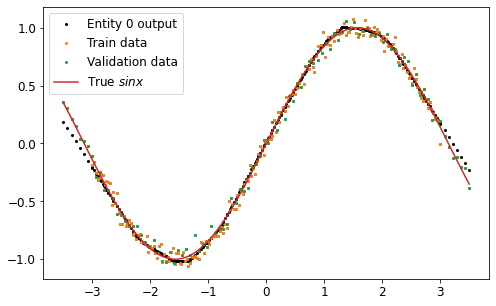

In [28]:
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[4].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=2, color="black")
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2, label="Validation data")
plt.plot(x_val, true_y, label=f"True $sinx$")
plt.legend()
plt.savefig("Entity_30_sin_output.png", dpi=300)
plt.show()